<a href="https://colab.research.google.com/github/mohsengolzardian/Slop-with-hole/blob/main/swelling_and_roughness_risper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

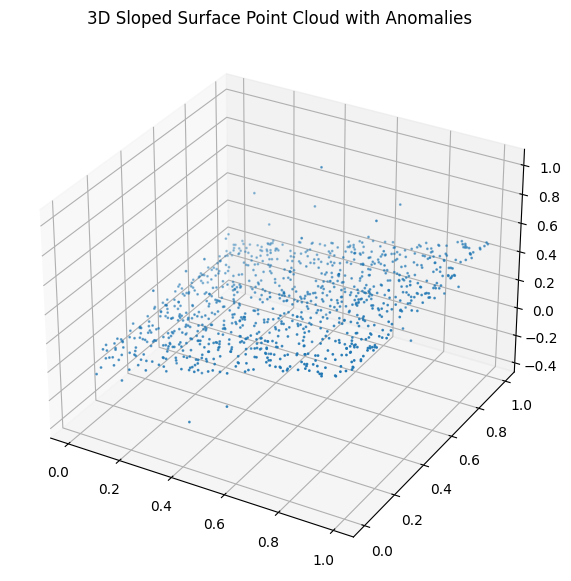

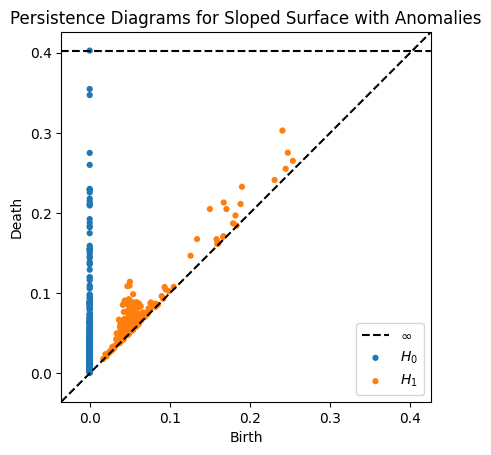

In [ ]:
# Install the required packages
!pip install ripser
!pip install persim

# Import necessary libraries
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate points on a sloped flat surface with anomalies
def generate_slope_surface_with_anomalies(n_points, slope=1, width=1, length=1, anomaly_chance=0.1):
    x = np.random.uniform(0, width, n_points)
    y = np.random.uniform(0, length, n_points)
    z = slope * x  # Linear slope

    # Introduce anomalies: swelling and roughness
    for i in range(n_points):
        if np.random.rand() < anomaly_chance:
            z[i] += np.random.normal(0, 0.2)  # Swelling: add a random bulge
        if np.random.rand() < anomaly_chance:
            z[i] += np.random.normal(0, 0.05)  # Roughness: small random perturbation

    return np.c_[x, y, z]

# Generate the dataset with anomalies
n_points = 1000
data = generate_slope_surface_with_anomalies(n_points, slope=0.5)

# Plot the 3D sloped surface with anomalies dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=1)
ax.set_title("3D Sloped Surface Point Cloud with Anomalies")
plt.show()

# Compute the persistence diagrams
diagrams = ripser(data)['dgms']

# Plot the persistence diagrams
plot_diagrams(diagrams, show=True, title="Persistence Diagrams for Sloped Surface with Anomalies")
